# Clone Project - [Sarcasm Detection : A Guide for ML and DL approache](https://www.kaggle.com/subbhashit/sarcasm-detection-a-guide-for-ml-and-dl-approach)

In [14]:
!pip install nltk

     |████████████████████████████████| 1.5 MB 2.2 MB/s 
     |████████████████████████████████| 82 kB 3.6 MB/s 
     |████████████████████████████████| 285 kB 22.4 MB/s 


In [16]:
# Basic Libraries

import numpy as np 
import pandas as pd 

# Visuals

import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.offline as py 
import plotly.figure_factory as ff 

# NLP Tasks 

import nltk 
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS 

# DL Tasks

import keras 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences 
from keras.models import Sequential
from keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, Bidirectional, LSTM, GRU 
import tensorflow as tf 

# ML Tasks 

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBClassifier, XGBRFRegressor, XGBRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Objective**

The objective of the notebook is to do Exploratory Data Analysis (EDA) and make prediction based on headlines as whether the headline is Sarcastic or not.

## Step 1. Loading and Viewing the Sample Dataset

In [18]:
import pandas as pd 
path = './data/'
data = pd.read_json(path + 'sarcasm.json')


In [19]:
data.describe()

,is_sarcastic
count,26709.000000
mean,0.438953
std,0.496269
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


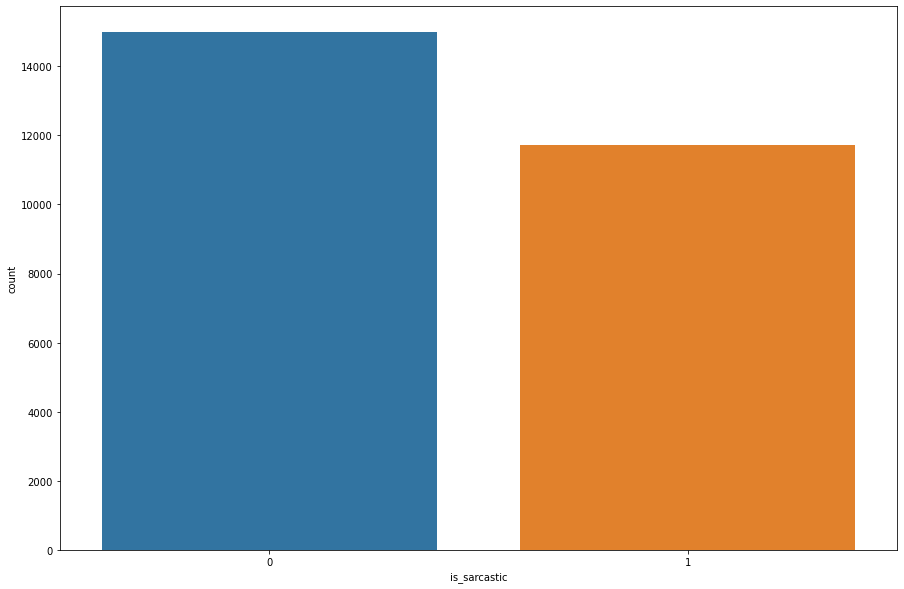

In [28]:
import warnings
warnings.filterwarnings(action='ignore')
plt.figure(figsize=(15,10))
sns.countplot(data.is_sarcastic);

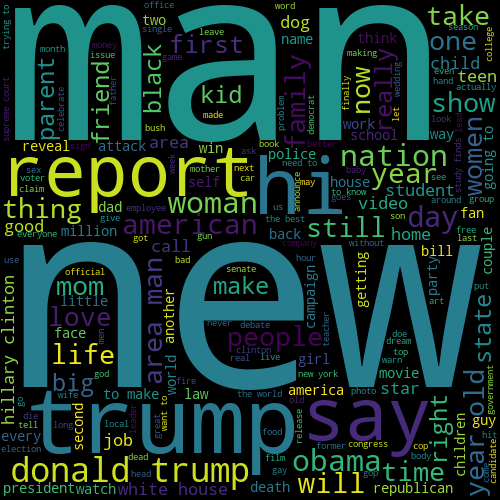

In [29]:
sen = np.array(data.headline)
wc = WordCloud(width = 500, height=500)
wc.generate(' '.join(sen))
wc.to_image()

In [30]:
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5,former versace store clerk sues over secret 'black code' for minority shoppers,0
1,https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365,"the 'roseanne' revival catches up to our thorny political mood, for better and worse",0
2,https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697,mom starting to fear son's web series closest thing she will have to grandchild,1
3,https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302,"boehner just wants wife to listen, not come up with alternative debt-reduction ideas",1
4,https://www.huffingtonpost.com/entry/jk-rowling-wishes-snape-happy-birthday_us_569117c4e4b0cad15e64fdcb,j.k. rowling wishes snape happy birthday in the most magical way,0


In [31]:
import re 
def process(x):
    processed_tweet = re.sub(r'\W', ' ', str(x))
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet)
    processed_tweet = re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)
    processed_tweet = processed_tweet.lower()
    return processed_tweet
data.headline = data.headline.apply(process)

In [32]:
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5,former versace store clerk sues over secret black code for minority shoppers,0
1,https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365,the roseanne revival catches up to our thorny political mood for better and worse,0
2,https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697,mom starting to fear son web series closest thing she will have to grandchild,1
3,https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302,boehner just wants wife to listen not come up with alternative debt reduction ideas,1
4,https://www.huffingtonpost.com/entry/jk-rowling-wishes-snape-happy-birthday_us_569117c4e4b0cad15e64fdcb,j rowling wishes snape happy birthday in the most magical way,0
